In [93]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Preprocessing

In [94]:
#Load the csv file: breast-cancer-wisconsin. 

data = pd.read_csv('breast-cancer-wisconsin.csv',names=['id','clump','cell_size','cell_shape','adhesion','epithelial','nuclei','chromatin','nucleoli','mitoses','class'], na_values='?')

For given dataset, the first column, id is unique number of patient data, and I have treated this value as index. Column number 2 - 10 are the features for the model. All these values have numberic values. Our class attribute is the last column of the dataset. For this column too, numbers 2 and 4 are used to denote the benign and malignant cancer state.

In [95]:
# Replace null values "?" by numpy.NaN

data = data.replace("?", np.NaN)
data.shape

(699, 11)

In [96]:
#Check if there are duplicates. If so, remove them.

isDuplicatePresent = data.duplicated().any()
print(isDuplicatePresent)

if (isDuplicatePresent):
    data = data.drop_duplicates()
data.shape

True


(691, 11)

In [97]:
# eight duplicates values were removed

In [98]:
# Set id column as index 

data = data.set_index('id')
data

,clump,cell_size,cell_shape,adhesion,epithelial,nuclei,chromatin,nucleoli,mitoses,class
id,,,,,,,,,,
1000025,5,1,1,1,2,1.0,3,1,1,2
1002945,5,4,4,5,7,10.0,3,2,1,2
1015425,3,1,1,1,2,2.0,3,1,1,2
1016277,6,8,8,1,3,4.0,3,7,1,2
1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
776715,3,1,1,1,3,2.0,1,1,1,2
841769,2,1,1,1,2,1.0,1,1,1,2
888820,5,10,10,3,7,3.0,8,10,2,4


In [99]:
# Fill null values with mean value of the respective column

print(data.isnull().sum())
data["nuclei"] = data["nuclei"].fillna(round(data["nuclei"].median(),2))
print("\nAfter filling the data:\n",data.isnull().sum())

clump          0
cell_size      0
cell_shape     0
adhesion       0
epithelial     0
nuclei        16
chromatin      0
nucleoli       0
mitoses        0
class          0
dtype: int64

After filling the data:
 clump         0
cell_size     0
cell_shape    0
adhesion      0
epithelial    0
nuclei        0
chromatin     0
nucleoli      0
mitoses       0
class         0
dtype: int64


In [100]:
#Get descriptive states of the data

data.describe()

,clump,cell_size,cell_shape,adhesion,epithelial,nuclei,chromatin,nucleoli,mitoses,class
count,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,4.426918,3.130246,3.201158,2.824891,3.211288,3.479016,3.435601,2.882779,1.593343,2.688857
std,2.815861,3.041328,2.959886,2.866552,2.199852,3.615676,2.442345,3.066298,1.723129,0.951051
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [101]:
#Define a function to draw boxplot

def plot_boxplot(dataframe, column_name):
    dataframe.boxplot(column = [column_name])
    plt.grid(False)
    plt.show()

<AxesSubplot:>

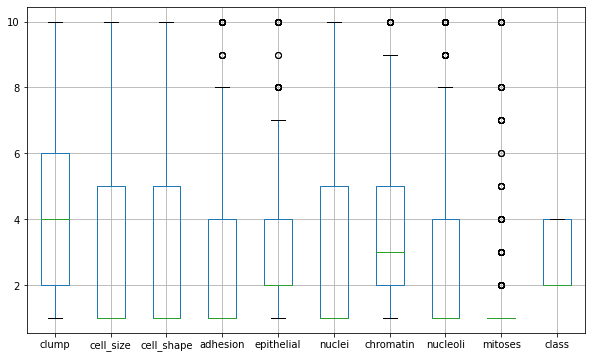

In [102]:
#Plot all the boxplots for outliers

data.boxplot(figsize = (10, 6))

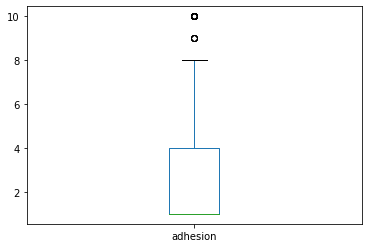

In [103]:
#plot individual boxplot for adhesion, epithelial, chromatin, nucleoli

plot_boxplot(data, "adhesion")

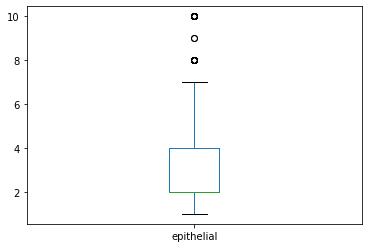

In [104]:
plot_boxplot(data, "epithelial")

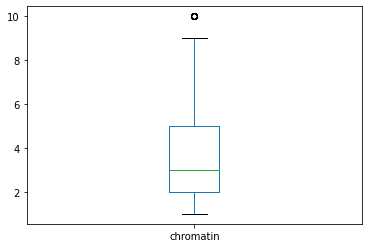

In [105]:
plot_boxplot(data, "chromatin")

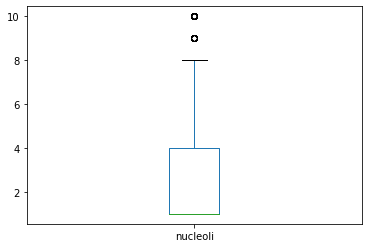

In [106]:
plot_boxplot(data, "nucleoli")

Remove outliers

In [107]:
#Define a function which will give the index of outlier column
#Calculate IQR
#Calculate Lower and Upper bound

def outlierIndices(dataframe, column_name):
    Q1 = dataframe[column_name].quantile(0.25)
    Q3 = dataframe[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 *IQR
    
    outlier_column_index_list = dataframe.index[(dataframe[column_name]<lower_bound) | (dataframe[column_name]>upper_bound)]
    
    return outlier_column_index_list

In [108]:
#Create array to store outlier index

index_list = []
for each_column in ["adhesion","epithelial","chromatin","nucleoli"]:
    index_list.extend(outlierIndices(data, each_column))

In [109]:
#print the number of outlier entries/rows.
#There can be repeated row entries too, hence need to be sorted and duplicates need to be removed.

len(index_list)

209

In [110]:
#Write a function, which will remove the outlier data with above incex list and give clean data.
#Sort, remove duplicate from index list.

def removeOutliers(dataframe, outlier_row_index_list):
    outlier_row_index_list = sorted(set(outlier_row_index_list))
    dataframe = dataframe.drop(outlier_row_index_list)
    return dataframe


In [111]:
cleaned_data = removeOutliers(data, index_list)

In [112]:
cleaned_data.shape

(546, 10)

In [145]:
# Print cleaned data and save it to csv

print(cleaned_data.to_string())
cleaned_data.to_csv("Preprocessed.csv",index=False)

          clump  cell_size  cell_shape  adhesion  epithelial  nuclei  chromatin  nucleoli  mitoses  class
id                                                                                                       
1000025       5          1           1         1           2     1.0          3         1        1      2
1002945       5          4           4         5           7    10.0          3         2        1      2
1015425       3          1           1         1           2     2.0          3         1        1      2
1016277       6          8           8         1           3     4.0          3         7        1      2
1017023       4          1           1         3           2     1.0          3         1        1      2
1017122       8         10          10         8           7    10.0          9         7        1      4
1018099       1          1           1         1           2    10.0          3         1        1      2
1018561       2          1           2        

# Applying Techniques

In [114]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import KFold 
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [115]:
# Separate feature from target column

features = list(cleaned_data.columns[:9])
features

['clump',
 'cell_size',
 'cell_shape',
 'adhesion',
 'epithelial',
 'nuclei',
 'chromatin',
 'nucleoli',
 'mitoses']

In [116]:
y = cleaned_data["class"]
x = cleaned_data[features]

Decision Tree

In [117]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [118]:
# Model created ad trained

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

In [119]:
#predict the response

y_pred = clf.predict(x_test)

In [120]:
# Print accuracy

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9343065693430657


10 Fold cross validation

In [122]:
model = svm.SVC()

In [123]:
accuracy = cross_val_score(model,x,y,scoring='accuracy', cv=10)

In [124]:
print(accuracy)

[0.90909091 0.98181818 0.94545455 0.92727273 0.96363636 0.96363636
 1.         0.98148148 0.98148148 1.        ]


In [125]:
print("Accuracy of Model with Cross Validation is:",accuracy.mean())

Accuracy of Model with Cross Validation is: 0.9653872053872053


Random Forest

In [126]:
from sklearn.ensemble import RandomForestClassifier

clf_forest = RandomForestClassifier(n_estimators=10)
clf_forest = clf_forest.fit(x_train, y_train)

#Predict 
y_pred = clf_forest.predict(x_test)

In [127]:
rfc_accuracy = cross_val_score(clf_forest,x,y,scoring='accuracy', cv=10)

In [128]:
print(rfc_accuracy)

[0.94545455 0.96363636 0.90909091 0.92727273 0.96363636 0.98181818
 0.98148148 0.98148148 0.96296296 0.98148148]


In [129]:
print("Accuracy of Model with Cross Validation is:",rfc_accuracy.mean())

Accuracy of Model with Cross Validation is: 0.9598316498316498


Does it perform better than decision tree?

For current set of values, the decision tree has better performance than the random forest tree, both with K=10 folds.

The decision tree, with K-fold cross validation has an accuracy of 0.9653872053872053, whereas the same of random forst is 0.9544107744107743.

KNN

In [131]:
#KNeighbors

from sklearn.neighbors import KNeighborsClassifier


kneigh = KNeighborsClassifier(n_neighbors=10)
kneigh = kneigh.fit(x_train, y_train)

#predict
y_pred = kneigh.predict(x_test)

In [132]:
kneigh_accuracy = cross_val_score(kneigh,x,y,scoring='accuracy', cv=10)

In [133]:
print(kneigh_accuracy)

[0.90909091 0.98181818 0.94545455 0.92727273 0.96363636 0.96363636
 1.         0.96296296 0.98148148 1.        ]


In [134]:
print("Accuracy of KNN Model with Cross Validation is:",kneigh_accuracy.mean())

Accuracy of KNN Model with Cross Validation is: 0.9635353535353535


Checking accuracy with different numbers of K

In [136]:
# different values for neighbors
neighbors = list(range(1, 51, 1))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for each_k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=each_k)
    scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
print("Accuracies of kNN Model with different Cross Validation are:")
i = 0
while(i<len(cv_scores)):
    print("K = ",i+1 , " Accurcay:", cv_scores[i])
    i = i+1

Accuracies of kNN Model with different Cross Validation are:
K =  1  Accurcay: 0.9507744107744107
K =  2  Accurcay: 0.937912457912458
K =  3  Accurcay: 0.9653535353535352
K =  4  Accurcay: 0.9580134680134679
K =  5  Accurcay: 0.9671717171717171
K =  6  Accurcay: 0.9635353535353535
K =  7  Accurcay: 0.9672053872053871
K =  8  Accurcay: 0.9689898989898988
K =  9  Accurcay: 0.9671717171717171
K =  10  Accurcay: 0.9635353535353535
K =  11  Accurcay: 0.9653872053872053
K =  12  Accurcay: 0.9653535353535354
K =  13  Accurcay: 0.9672053872053871
K =  14  Accurcay: 0.9672053872053871
K =  15  Accurcay: 0.9653872053872053
K =  16  Accurcay: 0.9635353535353535
K =  17  Accurcay: 0.9653872053872053
K =  18  Accurcay: 0.9635353535353535
K =  19  Accurcay: 0.9617171717171716
K =  20  Accurcay: 0.9562626262626261
K =  21  Accurcay: 0.958080808080808
K =  22  Accurcay: 0.958080808080808
K =  23  Accurcay: 0.958080808080808
K =  24  Accurcay: 0.9598989898989899
K =  25  Accurcay: 0.9598989898989899
K 

The optimal number of neighbors is 8


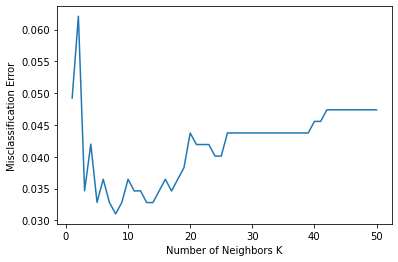

In [137]:
# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

Behaviour of K:

The value of K play a substancial role in the KNN. To determine the role of K, we calculate the different cross-validation with varying neighbors. 

I have caluculated misclassification error for each  value of K. Lower the misclassification error better is the result. I have plotted the misclassification error against the number of neighbors k. 

By looking at the graph, we can conclude that at the start of the graph, the plot increases to its maximum value. After which it sharpely reduces. It shows a patter of increasing and decreasing till the time it reaches the minimal value. After reaching the minimum value it reaches it starts to increase with minor decrease in the graph.

For our graph, as graph reaches the value around 25 then graph becomes a plateanu with minor increase in it.

Best value of K:

For our dataset, 8 is the best value for K, with the accuracy of 0.9689898989898988.

Naive Bayes

In [138]:
from sklearn.naive_bayes import MultinomialNB

In [139]:
nb_clf = MultinomialNB()
nb_clf = nb_clf.fit(x_train, y_train)

#Predict 
y_pred = nb_clf.predict(x_test)

In [140]:
nb_clf_accuracy = cross_val_score(nb_clf,x,y,scoring='accuracy', cv=10)
print(nb_clf_accuracy)
print("Accuracy of NB Model with Cross Validation is:",nb_clf_accuracy.mean())

[0.87272727 0.85454545 0.92727273 0.96363636 0.96363636 0.87272727
 0.98148148 0.88888889 0.90740741 0.96296296]
Accuracy of NB Model with Cross Validation is: 0.9195286195286195


Gaussian Naive Bayes

In [141]:
from sklearn.naive_bayes import GaussianNB

In [142]:
nbg_clf = GaussianNB()

In [143]:
nbg_clf = nbg_clf.fit(x_train, y_train)

#Predict 
y_pred = nbg_clf.predict(x_test)

In [144]:
nbg_clf_accuracy = cross_val_score(nbg_clf,x,y,scoring='accuracy', cv=10)
print(nbg_clf_accuracy)
print("Accuracy of NBG Model with Cross Validation is:",nbg_clf_accuracy.mean())

[0.92727273 1.         0.90909091 0.92727273 0.96363636 0.94545455
 1.         0.98148148 0.94444444 0.98148148]
Accuracy of NBG Model with Cross Validation is: 0.958013468013468


Performance comparison between two Naive Bayes Classifiers:

Yes, the accuracy of Gaussian Naive Bayes is better than that of Naive Bayes. The accuracy, which I got with plain Naive Bayes is 0.9195286195286195 and the accuracy with Naive Bayes Gausian is 0.958013468013468. This is significantly beeter than the plain Naive Bayes Classifier. 

# Conclusion:

For the current data, different methods have given the different accuracy level. All the methods, have accuracies more than 90%, when used with 10-fold cross validation.

Following is the order of cross validation accuracies, from highest to lowest:
1. KNN with (K = 8) - 0.9689898989898988
2. Decision Tree - 0.9653872053872053
3. KNN with (K = 10) - 0.9635353535353535
4. Naive Bayes Gausian - 0.958013468013468
5. Random forest - 0.9507407407407407
6. Naive Bayes - 0.9195286195286195